In [1]:
# Import all the required packages
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Read the training data
train_data = pd.read_csv(r"D:\Great_Learning_MTech\Jupyter_notebooks\Kaggle Notebooks\Kaggle\Titanic\train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Let us look at statistical implication of the data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# An overview of the dataset structure
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Handling Missing Data

In [5]:
train_data_length = len(train_data)
for col in train_data.columns:
    missing_percent = (train_data[col].isnull().sum()/train_data_length) * 100
    print(f"Missing value % in {col} is: {missing_percent}")

Missing value % in PassengerId is: 0.0
Missing value % in Survived is: 0.0
Missing value % in Pclass is: 0.0
Missing value % in Name is: 0.0
Missing value % in Sex is: 0.0
Missing value % in Age is: 19.865319865319865
Missing value % in SibSp is: 0.0
Missing value % in Parch is: 0.0
Missing value % in Ticket is: 0.0
Missing value % in Fare is: 0.0
Missing value % in Cabin is: 77.10437710437711
Missing value % in Embarked is: 0.22446689113355783


In [6]:
# Since the missing value % in Cabin in 77% we will drop the Cabin column and also its of less significance
# for the prediction
train_data.drop(columns='Cabin', inplace=True)

In [7]:
# Next we will fill up the missing value for Embarked
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
train_data[train_data['Embarked'].isnull()]

# We will fill the NaN values with the most frequent Embark value
train_data['Embarked'] = train_data['Embarked'].replace(np.NaN, 'S')

In [9]:
# Before treating the missing value in Age column, we can see from the stats description that
# the minimum value for the fare is 0, which is kind of odd as the fare cannot be 0
# Lets check the rows which have Fare with 0

train_data[train_data['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,S


In [10]:
# We will replace the Fare 0 with the median value of the Fare for each Pclass
train_data['Fare'] = train_data['Fare'].replace(0, np.NaN)
train_data['Fare'] = train_data['Fare'].fillna(train_data.groupby(['Pclass'])['Fare'].transform('median'))

In [11]:
# Next we will fill in the missing value in Age column
from sklearn.impute import KNNImputer

knnImputer = KNNImputer()
num_data = train_data.select_dtypes(include=np.number)
data_imputed = knnImputer.fit_transform(num_data)
data_imputed_df = pd.DataFrame(data_imputed, columns=num_data.columns)
train_data['Age'] = train_data['Age'].fillna(data_imputed_df['Age'])

In [12]:
train_data_length = len(train_data)
for col in train_data.columns:
    missing_percent = (train_data[col].isnull().sum()/train_data_length) * 100
    print(f"Missing value % in {col} is: {missing_percent}")

Missing value % in PassengerId is: 0.0
Missing value % in Survived is: 0.0
Missing value % in Pclass is: 0.0
Missing value % in Name is: 0.0
Missing value % in Sex is: 0.0
Missing value % in Age is: 0.0
Missing value % in SibSp is: 0.0
Missing value % in Parch is: 0.0
Missing value % in Ticket is: 0.0
Missing value % in Fare is: 0.0
Missing value % in Embarked is: 0.0


We have cleaned all the missing value data in all the columns.

Next we will look into the outlier treatment

### Outlier Treatment

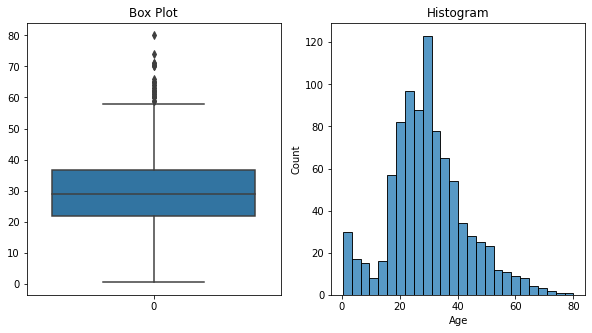

In [13]:
fig,axes = plt.subplots(1, 2, figsize=(10,5))
sb.boxplot(data=train_data['Age'], ax=axes[0])
sb.histplot(train_data['Age'], ax=axes[1])
axes[0].set_title("Box Plot")
axes[1].set_title("Histogram")
plt.show()

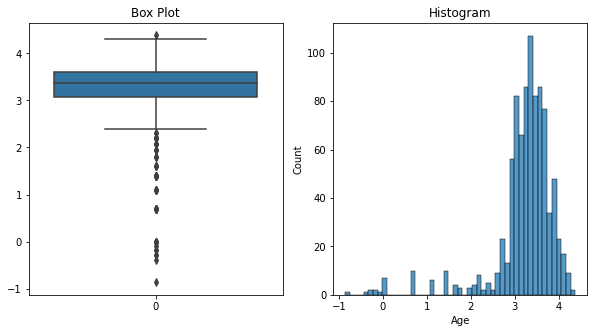

In [14]:
# Lets try different transformation techiniques

# log transformation
age_log = np.log(train_data['Age'])
fig,axes = plt.subplots(1, 2, figsize=(10,5))
sb.boxplot(data=age_log, ax=axes[0])
sb.histplot(age_log, ax=axes[1])
axes[0].set_title("Box Plot")
axes[1].set_title("Histogram")
plt.show()

Though the log transformation retained the normal distribution properties, it failed to deal with the outliers value

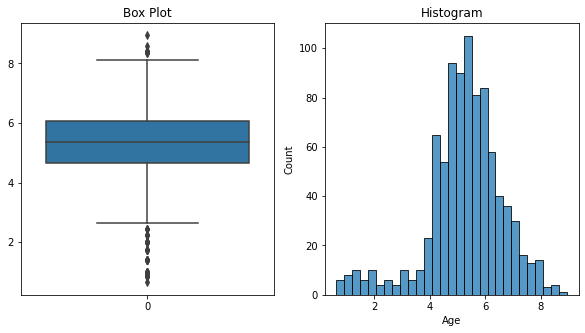

In [15]:
# sqrt transformation

age_sqrt = np.sqrt(train_data['Age'])
fig,axes = plt.subplots(1, 2, figsize=(10,5))
sb.boxplot(data=age_sqrt, ax=axes[0])
sb.histplot(age_sqrt, ax=axes[1])
axes[0].set_title("Box Plot")
axes[1].set_title("Histogram")
plt.show()

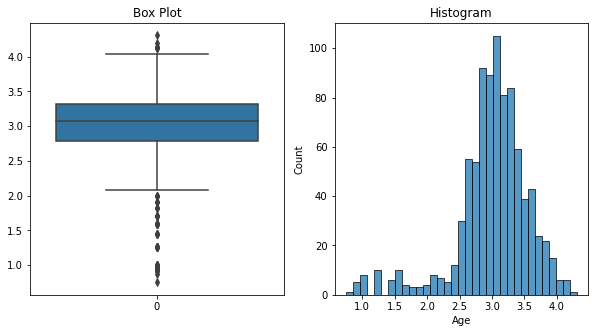

In [16]:
# cbrt transformation

age_cbrt = np.cbrt(train_data['Age'])
fig,axes = plt.subplots(1, 2, figsize=(10,5))
sb.boxplot(data=age_cbrt, ax=axes[0])
sb.histplot(age_cbrt, ax=axes[1])
axes[0].set_title("Box Plot")
axes[1].set_title("Histogram")
plt.show()

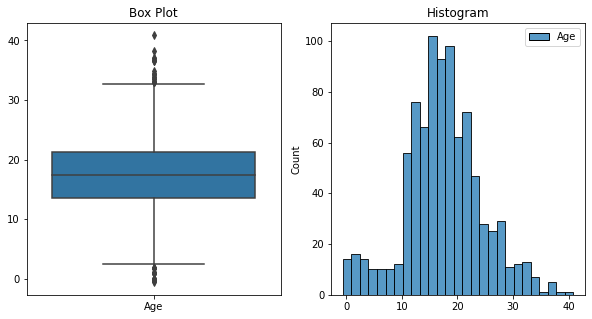

In [17]:
# Box cox transformation
age_bct_dat, fitted_lmbda_age = stats.boxcox(train_data["Age"], lmbda=None)

age_bct_dat = pd.DataFrame(age_bct_dat, columns=["Age"])
fig,axes = plt.subplots(1, 2, figsize=(10,5))
sb.boxplot(data=age_bct_dat, ax=axes[0])
sb.histplot(age_bct_dat, ax=axes[1])
axes[0].set_title("Box Plot")
axes[1].set_title("Histogram")
plt.show()

From all the transformations boxcox transformation seems to be the ideal way to convert the Age to a normally
distributed

In [18]:
train_data['AgeNorm'] = age_bct_dat

In [19]:
# Next we will treat the Fare column
train_data[["Fare"]].describe()

,Fare
count,891.000000
mean,32.689318
std,49.611639
min,4.012500
25%,7.925000
50%,14.500000
75%,31.275000
max,512.329200


In [20]:
fare_cbrt_data = np.cbrt(train_data['Fare'])
fare_sqrt_data = np.sqrt(train_data['Fare'])
fare_log_data = np.log(train_data['Fare'])
fare_bct_data, fare_fitted_lamda = stats.boxcox(train_data["Fare"], lmbda=None)
fare_bct_data = pd.DataFrame(fare_bct_data, columns=["Fare"])

In [21]:
far_cmp_dat = [fare_log_data,fare_cbrt_data,fare_sqrt_data,fare_bct_data]

far_headers = ["Logarithmic Transformation", "Cube Root Normalization", 
              "Square Transformation","Box Transformation"]

far_cmp_dat = pd.concat(far_cmp_dat, axis=1, keys=far_headers)

far_cmp_dat.describe()

,Logarithmic Transformation,Cube Root Normalization,Square Transformation,Box Transformation
,Fare,Fare,Fare,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,2.944614,2.813656,4.934236,1.458869
std,0.934767,1.014984,2.889983,0.181568
min,1.389414,1.589053,2.003123,0.987914
25%,2.070022,1.993730,2.815138,1.265101
50%,2.674149,2.438499,3.807887,1.440809
75%,3.442819,3.150642,5.592406,1.597411
max,6.238967,8.001714,22.634690,1.840790


<AxesSubplot:>

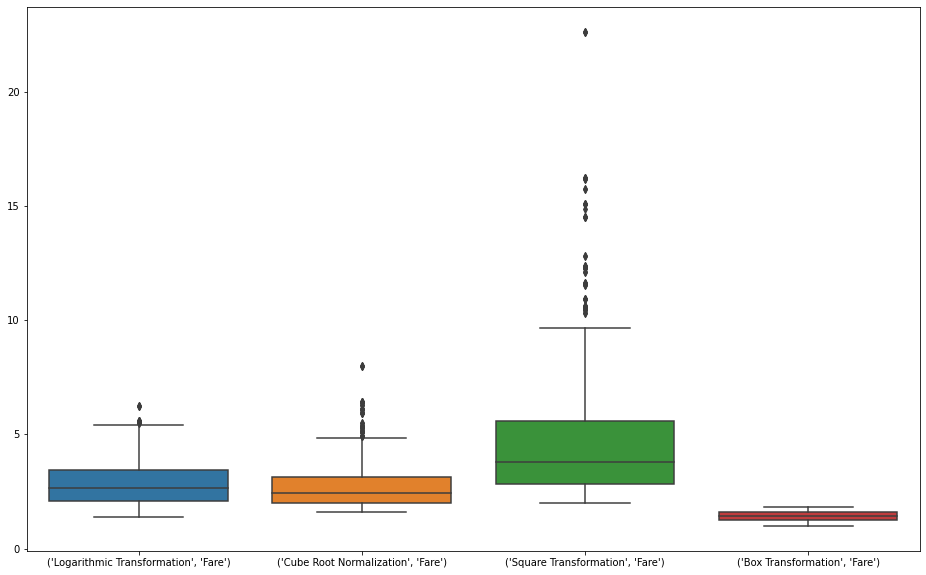

In [22]:
plt.figure(figsize=(16, 10))
sb.boxplot(data=far_cmp_dat)

From the above transformation methods, boxcox transformation is ideal for Fare, as it reduces the outliers

In [23]:
train_data['FareNorm'] = fare_bct_data

### Studying Correlation

In [24]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeNorm,FareNorm
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,13.675746,1.234197
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,21.904337,1.708250
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,15.819492,1.265101
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,20.423888,1.673978
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,20.423888,1.270387


In [25]:
# Correlation between Pclass and Survived
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# From the Pclass we can see that people belonging to higher class has high percentage of survival rate

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [26]:
# Correlation between Sex and Survived
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index= False).mean().sort_values(by='Survived', ascending=False)

# This shows that the female are more likely to survive than the male

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [27]:
# Correlation between Embarked and Survived
train_data[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [28]:
# Lets check the corrleation between age and Survived.

# First we will split the age into different categories so that its easier to compare
train_data['Age'].describe()

count    891.000000
mean      29.685544
std       13.327400
min        0.420000
25%       21.800000
50%       28.900000
75%       36.650000
max       80.000000
Name: Age, dtype: float64

Let us use the following categorization :

    Ages 0 to 18 (children) - children

    Ages 18 to 30 (youth) - youth

    Ages 30 to 45 (adults) - adults

    Ages 45 to 60 (middle ages) - middle aged

    Age 60+ (senior citizens) - senior citizen



In [29]:
column_labels = ['children', 'youth', 'adult','middle aged', 'senior citizen']
train_data['AgeGroup'] = pd.cut(x=train_data['Age'], bins=[0,18,30,45,60, train_data['Age'].max()],labels=column_labels)

In [30]:
train_data[['AgeGroup','Survived']].groupby(['AgeGroup'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,AgeGroup,Survived
0,children,0.507042
3,middle aged,0.421687
2,adult,0.389892
1,youth,0.332425
4,senior citizen,0.227273


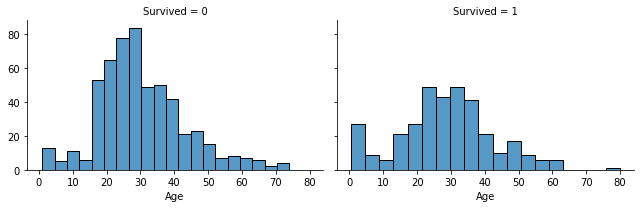

In [31]:
age_grid = sb.FacetGrid(data=train_data, col='Survived',aspect=1.5)
age_grid.map(sb.histplot, 'Age')

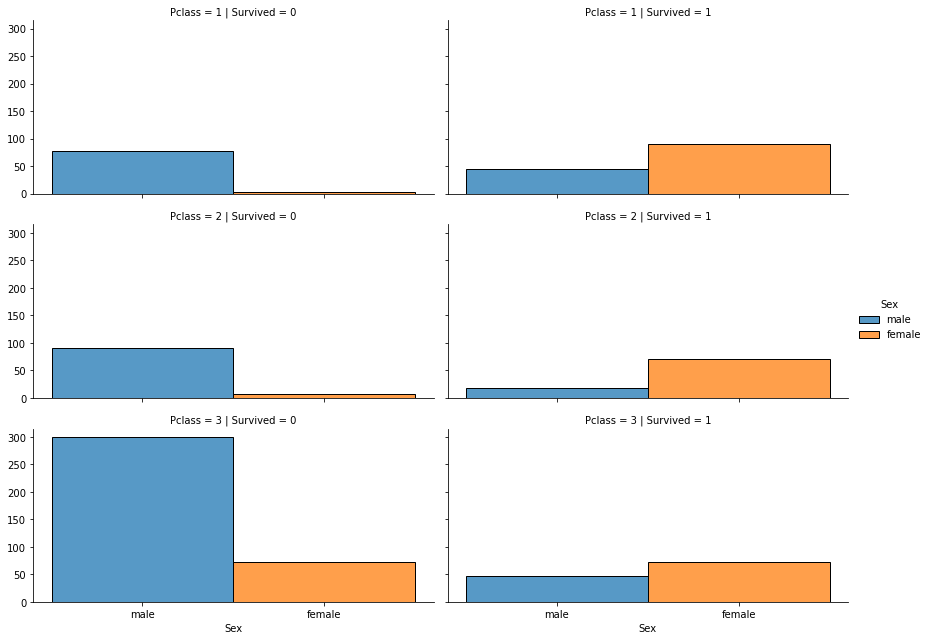

In [32]:
# Lets check if the Pclass has any gender bias on survival

class_grid = sb.FacetGrid(data=train_data, col='Survived', row='Pclass', hue='Sex', aspect=2.0)
class_grid.map(sb.histplot, 'Sex', discrete=True)
class_grid.add_legend()

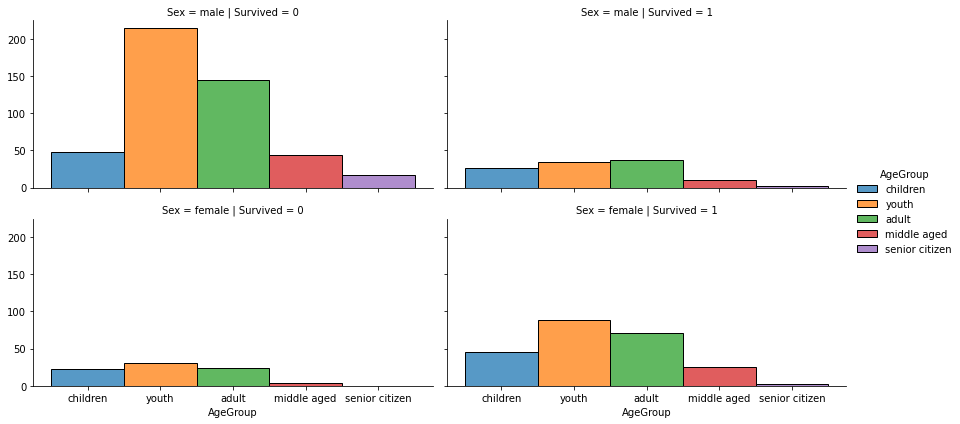

In [33]:
# Age and Sex

age_sex_grid = sb.FacetGrid(data=train_data, col='Survived', row='Sex', hue='AgeGroup', aspect=2.0)
age_sex_grid.map(sb.histplot, 'AgeGroup', discrete=True)
age_sex_grid.add_legend()

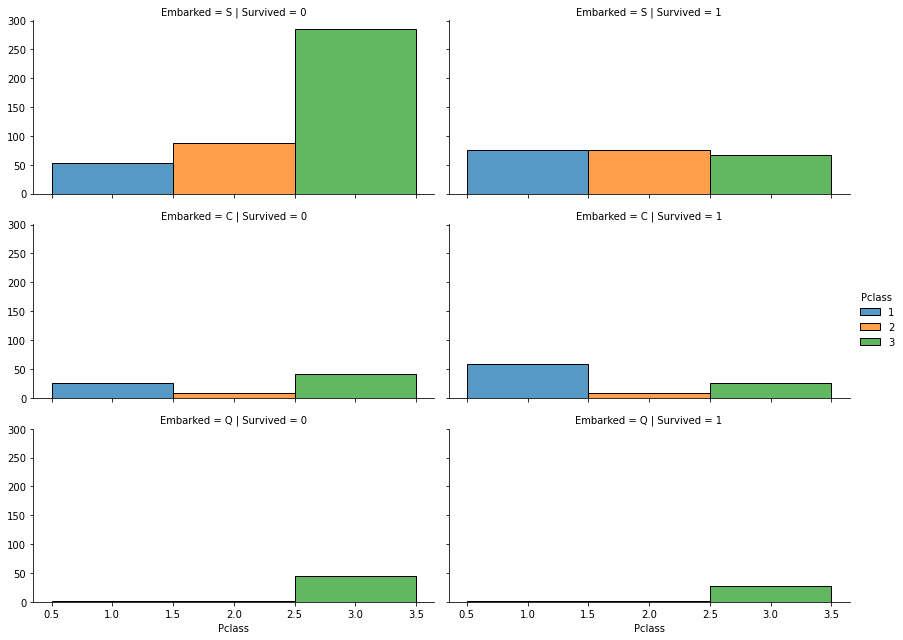

In [34]:
class_embark_grid = sb.FacetGrid(data=train_data, col='Survived', row='Embarked', hue='Pclass', aspect=2.0)
class_embark_grid.map(sb.histplot, 'Pclass', discrete=True)
class_embark_grid.add_legend()

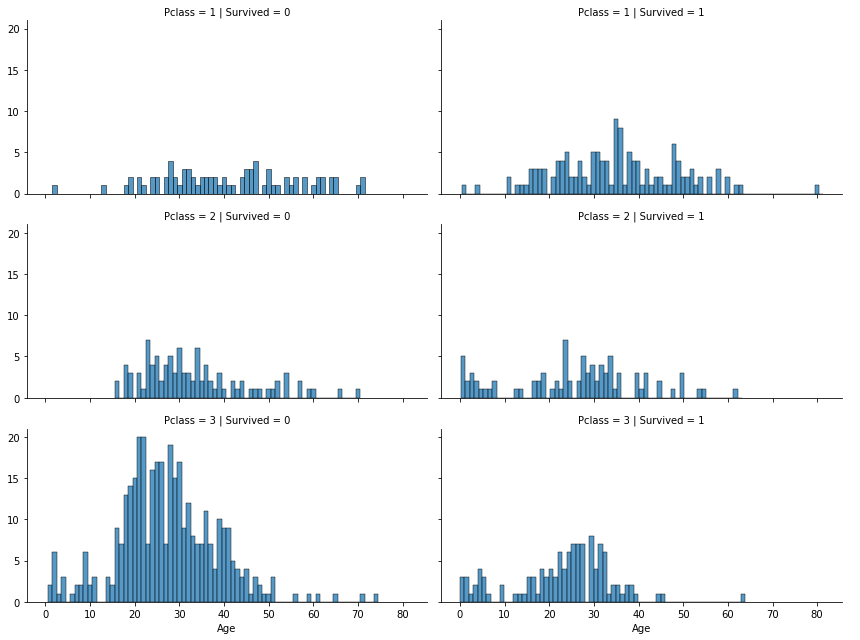

In [35]:
# Pclass and Age

class_age_grid = sb.FacetGrid(data=train_data, col='Survived', row='Pclass', aspect=2.0)
class_age_grid.map(sb.histplot, 'Age', discrete=True)
class_age_grid.add_legend()

In [36]:
# Since the Parch and SibSp both below to the family members boarded with the passenger, we can combine
# them to create a new column and FamilyCount

train_data['FamilCount'] = (train_data['Parch'] + train_data['SibSp'])

In [37]:
train_data[['FamilCount', 'Survived']].groupby(['FamilCount'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilCount,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [38]:
# Drop the unwanted columns
train_data.head()
train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], inplace=True)

### Encoding Categorical features

In [39]:
# Encoding Sex categorical feature
encode_sex = {"male":1, "female":0}
train_data["Sex"] = train_data["Sex"].replace(to_replace=encode_sex)

In [40]:
encode_embarked = {'S':0, 'C':1, 'Q':2}
train_data["Embarked"] = train_data["Embarked"].replace(to_replace=encode_embarked)

In [41]:
encode_age_group = {'children':0, 'youth':1, 'adult':2,'middle aged':3, 'senior citizen':4}
train_data["AgeGroup"] = train_data["AgeGroup"].replace(to_replace=encode_age_group)

In [42]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,AgeNorm,FareNorm,AgeGroup,FamilCount
0,0,3,1,22.0,7.2500,0,13.675746,1.234197,1,1
1,1,1,0,38.0,71.2833,1,21.904337,1.708250,2,1
2,1,3,0,26.0,7.9250,0,15.819492,1.265101,1,0
3,1,1,0,35.0,53.1000,0,20.423888,1.673978,2,1
4,0,3,1,35.0,8.0500,0,20.423888,1.270387,2,0


### Correlation amoung features

<AxesSubplot:>

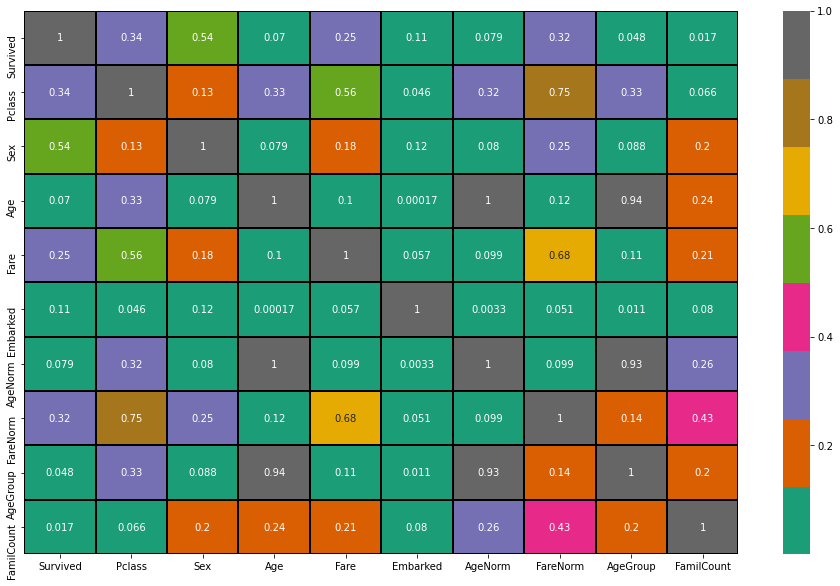

In [43]:
plt.figure(figsize=(16,10))
sb.heatmap(np.abs(train_data.corr()), cmap='Dark2', annot=True, linewidths=1.0, linecolor='black')

### Performing the Cleaning process on the Test data 

In [44]:
test_data = pd.read_csv(r"D:\Great_Learning_MTech\Jupyter_notebooks\Kaggle Notebooks\Kaggle\Titanic\test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
# An overview of the dataset structure
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [46]:
test_data.drop(columns='Cabin', inplace=True)

In [47]:
# We will replace the Fare 0 with the median value of the Fare for each Pclass
test_data['Fare'] = test_data['Fare'].replace(0, np.NaN)
test_data['Fare'] = test_data['Fare'].fillna(test_data.groupby(['Pclass'])['Fare'].transform('median'))

In [48]:
# Next we will fill in the missing value in Age column
from sklearn.impute import KNNImputer

knnImputer = KNNImputer()
num_data = test_data.select_dtypes(include=np.number)
data_imputed = knnImputer.fit_transform(num_data)
data_imputed_df = pd.DataFrame(data_imputed, columns=num_data.columns)
test_data['Age'] = test_data['Age'].fillna(data_imputed_df['Age'])

In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


### Handing outlier in Test data

In [50]:
# Fitting Age using Box Cox Transform
test_data["AgeNorm"] = pd.DataFrame(stats.boxcox(test_data["Age"], lmbda=fitted_lmbda_age), columns=["Age"])

# Fitting Fare using Box Cox Transform
test_data[["FareNorm"]] = pd.DataFrame(stats.boxcox(test_data["Fare"], lmbda=fare_fitted_lamda), columns=["Fare"])

### Creating new feature

In [51]:
column_labels = ['children', 'youth', 'adult','middle aged', 'senior citizen']
test_data['AgeGroup'] = pd.cut(x=test_data['Age'], bins=[0,18,30,45,60, test_data['Age'].max()],labels=column_labels)

In [52]:
test_data['FamilCount'] = (test_data['Parch'] + test_data['SibSp'])

### Encoding categorical feature in Test data 

In [53]:
# Encoding Sex categorical feature
encode_sex = {"male":1, "female":0}
test_data["Sex"] = test_data["Sex"].replace(to_replace=encode_sex)

In [81]:
# Encoding the embarked feature

encode_embarked = {'S':0, 'C':1, 'Q':2}
test_data["Embarked"] = test_data["Embarked"].replace(to_replace=encode_embarked)

In [82]:
# Encoding Age group feature
encode_age_group = {'children':0, 'youth':1, 'adult':2,'middle aged':3, 'senior citizen':4}
test_data["AgeGroup"] = test_data["AgeGroup"].replace(to_replace=encode_age_group)

### Dropping unwanted columns 

In [ ]:
test_data.drop(columns=['Name', 'Ticket', 'SibSp', 'Parch'], inplace=True)

### Model Building

In [84]:
import statsmodels.api as sm

In [85]:
output_data = train_data['Survived']
input_data = train_data.drop(columns='Survived')

In [86]:
input_constant = sm.add_constant(input_data)
input_constant.head(2)

,const,Pclass,Sex,Age,Fare,Embarked,AgeNorm,FareNorm,AgeGroup,FamilCount
0,1.0,3,1,22.0,7.2500,0,13.675746,1.234197,1,1
1,1.0,1,0,38.0,71.2833,1,21.904337,1.708250,2,1


In [87]:
model = sm.OLS(output_data, input_constant) # This will call the OLS function to calculate and create all the matrix and template ready

# fit will actually apply all the inputs in the mathematical function 
# and calculate all the co-efficients and Bo

ols_model = model.fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     67.79
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           1.49e-94
Time:                        19:48:42   Log-Likelihood:                -387.53
No. Observations:                 891   AIC:                             795.1
Df Residuals:                     881   BIC:                             843.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3093      0.304      4.304      0.000       0.712       1.906
Pclass        -0.1521      0.031     -4.899      0.000      -0.213      -0.091
Sex           -0.5160      0.028    -18.518      0.000      -0.571      -0.461
Age            0.0291      0.013      2.263      0.024       0.004       0.054
Fare           0.0003      0.000      0.826      0.409      -0.000       0.001
Embarked       0.0404      0.020      1.990      0.047       0.001       0.080
AgeNorm       -0.0762      0.023     -3.320      0.001      -0.121      -0.031
FareNorm       0.0934      0.167      0.558      0.577      -0.235       0.422
AgeGroup       0.0716      0.041      1.728      0.084      -0.010       0.153
FamilCount    -0.0459      0.012     -3.901      0.000      -0.069      -0.023
==============================================================================
Omnibus:                       35.797   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.062
Skew:                           0.499   Prob(JB):                     3.30e-09
Kurtosis:                       3.241   Cond. No.                     1.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
# Multi Collinearity can be handled using the Variance inflation factor(VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
for i,col in enumerate(input_data):
    print(col,'-', variance_inflation_factor(input_data.values, i))

Pclass - 10.794615165298378
Sex - 3.098083029580308
Age - 1093.5238882816318
Fare - 2.586989596213575
Embarked - 1.3858548059494842
AgeNorm - 1140.1850027635228
FareNorm - 26.51335870734923
AgeGroup - 31.113306463887078
FamilCount - 2.005617844930671


In [90]:
input_data = input_data.drop('Age', axis=1)

In [91]:
for i,col in enumerate(input_data):
    print(col,'-', variance_inflation_factor(input_data.values, i))

Pclass - 9.651326270373525
Sex - 3.096652735676755
Fare - 2.5700582693209117
Embarked - 1.385572565706603
AgeNorm - 56.80760937344329
FareNorm - 24.23419638641779
AgeGroup - 25.57792025171454
FamilCount - 1.8180343307743783


In [92]:
input_data = input_data.drop('FareNorm', axis=1)

In [93]:
for i,col in enumerate(input_data):
    print(col,'-', variance_inflation_factor(input_data.values, i))

Pclass - 7.456498911933088
Sex - 3.0175755304596676
Fare - 1.87021083461951
Embarked - 1.3839790675928993
AgeNorm - 39.975774559200175
AgeGroup - 22.691479584852193
FamilCount - 1.5976539160472476


In [94]:
input_data = input_data.drop('AgeNorm', axis=1)

In [95]:
for i,col in enumerate(input_data):
    print(col,'-', variance_inflation_factor(input_data.values, i))

Pclass - 4.198242775228156
Sex - 2.9934851273138516
Fare - 1.615220135789453
Embarked - 1.3812499067585247
AgeGroup - 2.718640859092569
FamilCount - 1.567498716273669


In [ ]:
test_data.drop(columns=['AgeNorm', 'FareNorm', 'Age'], inplace=True)

In [97]:
# Now multicollinearity assumptions is satified. We will rebuild
# the model again with the new set of inputs
input_const = sm.add_constant(input_data)

model2 = sm.OLS(output_data, input_const)

ols_model_2 = model2.fit()
ols_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     93.70
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           4.89e-91
Time:                        19:49:04   Log-Likelihood:                -402.68
No. Observations:                 891   AIC:                             819.4
Df Residuals:                     884   BIC:                             852.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2003      0.064     18.846      0.000       1.075       1.325
Pclass        -0.1711      0.020     -8.498      0.000      -0.211      -0.132
Sex           -0.5104      0.028    -18.159      0.000      -0.566      -0.455
Fare           0.0003      0.000      0.818      0.414      -0.000       0.001
Embarked       0.0395      0.021      1.918      0.055      -0.001       0.080
AgeGroup      -0.0632      0.015     -4.303      0.000      -0.092      -0.034
FamilCount    -0.0276      0.009     -3.182      0.002      -0.045      -0.011
==============================================================================
Omnibus:                       42.949   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.084
Skew:                           0.565   Prob(JB):                     3.62e-11
Kurtosis:                       3.135   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

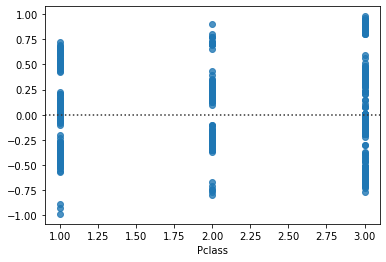

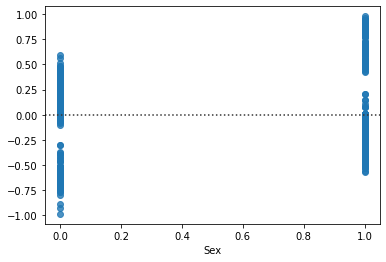

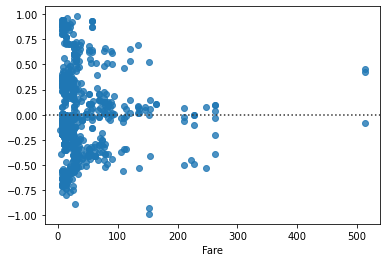

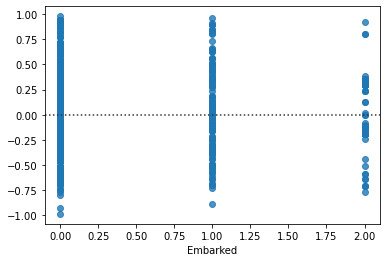

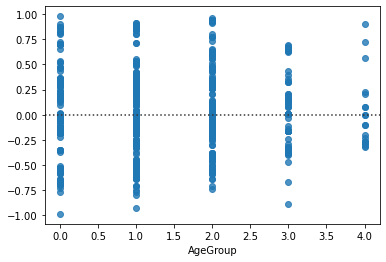

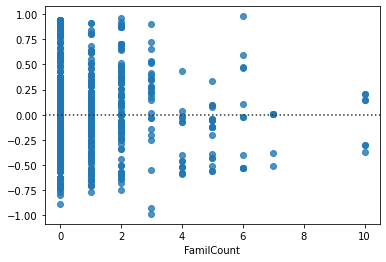

In [98]:
# For Linearity Assumption
for i in input_data.columns:
    sb.residplot(input_data[i],ols_model_2.resid)
    plt.show()

### Normality Assumption

In [99]:
ols_model_2.resid.skew()

0.5659716374525897

<AxesSubplot:ylabel='Density'>

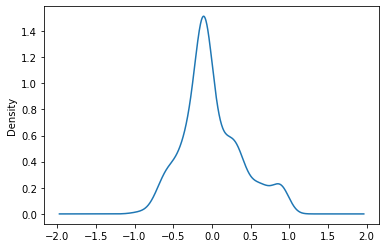

In [100]:
ols_model_2.resid.plot(kind='kde')

In [101]:
ols_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     93.70
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           4.89e-91
Time:                        19:49:14   Log-Likelihood:                -402.68
No. Observations:                 891   AIC:                             819.4
Df Residuals:                     884   BIC:                             852.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2003      0.064     18.846      0.000       1.075       1.325
Pclass        -0.1711      0.020     -8.498      0.000      -0.211      -0.132
Sex           -0.5104      0.028    -18.159      0.000      -0.566      -0.455
Fare           0.0003      0.000      0.818      0.414      -0.000       0.001
Embarked       0.0395      0.021      1.918      0.055      -0.001       0.080
AgeGroup      -0.0632      0.015     -4.303      0.000      -0.092      -0.034
FamilCount    -0.0276      0.009     -3.182      0.002      -0.045      -0.011
==============================================================================
Omnibus:                       42.949   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.084
Skew:                           0.565   Prob(JB):                     3.62e-11
Kurtosis:                       3.135   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ML Linear Regression Model

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [103]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.3, random_state=42)

In [104]:
lr_mod = LinearRegression()
lr_mod.fit(x_train, y_train) # Training of the model

LinearRegression()

In [105]:
# Apply the test data on the trained model
y_pred = lr_mod.predict(x_test)

predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.73%


In [106]:
# evaluating performance on training set
X_pred_train = lr_mod.predict(x_train)

predictions_train = [round(value) for value in X_pred_train]
accuracy_train = accuracy_score(y_train, predictions_train)
print("Accuracy: %.2f%%" % (accuracy_train * 100.0))

Accuracy: 79.78%


### Predicting output of test data

In [107]:
test_data.head()

,PassengerId,Pclass,Sex,Fare,Embarked,AgeGroup,FamilCount
0,892,3,1,7.8292,2,2,0
1,893,3,2,7.0000,0,3,1
2,894,2,1,9.6875,2,4,0
3,895,3,1,8.6625,0,1,0
4,896,3,2,12.2875,0,1,2


In [108]:
predictions = lr_mod.predict(test_data.iloc[:, 1:])

In [109]:
# Create DataFrame of PassengerId and Survived
submission_data = pd.DataFrame({"PassengerId":test_data["PassengerId"], "Survived":predictions})

submission_data.to_csv('prediction_data.csv')

### Predictions using xgboost

In [110]:
from xgboost import XGBClassifier

In [111]:
model = XGBClassifier(objective="binary:logistic", use_label_encoder=False, eval_metric='error')
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [112]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.60%


In [113]:
# evaluating performance on training set
X_pred_train = model.predict(x_train)
predictions_train = [round(value) for value in X_pred_train]
accuracy_train = accuracy_score(y_train, predictions_train)
print("Accuracy: %.2f%%" % (accuracy_train * 100.0))

Accuracy: 94.22%


In [114]:
predictions = model.predict(test_data.iloc[:, 1:])

# Create DataFrame of PassengerId and Survived
submission_data = pd.DataFrame({"PassengerId":test_data["PassengerId"], "Survived":predictions})

# Submission File
submission_data.to_csv('xgboost_prediction.csv')